In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np

import os
import random
import zipfile
import pathlib

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))


--2024-01-06 18:47:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.250.141.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   195MB/s    in 0.5s    

2024-01-06 18:47:43 (195 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [6]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


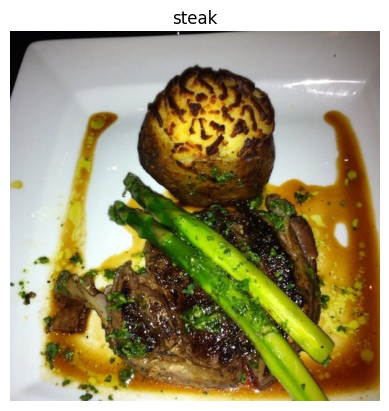

In [7]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [8]:
tf.random.set_seed(42)

#Preprocess Data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

#Import Data Into Batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

#Create a CNN model like Tiny VGG
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

#Fit
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 172ms/step - loss: 0.6049 - accuracy: 0.6580 - val_loss: 0.4949 - val_accuracy: 0.7640
Epoch 2/5
47/47 [==============================] - 7s 153ms/step - loss: 0.4651 - accuracy: 0.7753 - val_loss: 0.4075 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 6s 123ms/step - loss: 0.3986 - accuracy: 0.8200 - val_loss: 0.3251 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 5s 116ms/step - loss: 0.3451 - accuracy: 0.8580 - val_loss: 0.3187 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.2555 - accuracy: 0.9020 - val_loss: 0.4276 - val_accuracy: 0.8080


In [9]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 flatten (Flatten)           (None, 112360)            0         
                                                        

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


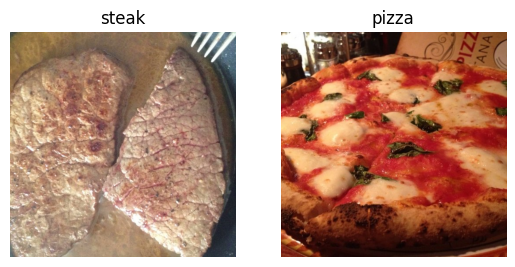

In [10]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

better model

In [11]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

import pandas as pd

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [13]:
model_2 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

#Compile
model_2.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

#Fit
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 8s 129ms/step - loss: 1.1073 - accuracy: 0.6987 - val_loss: 0.4119 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4329 - accuracy: 0.8113 - val_loss: 0.4072 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.3368 - accuracy: 0.8640 - val_loss: 0.3528 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 6s 135ms/step - loss: 0.2421 - accuracy: 0.9253 - val_loss: 0.3824 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.1557 - accuracy: 0.9560 - val_loss: 0.3457 - val_accuracy: 0.8440


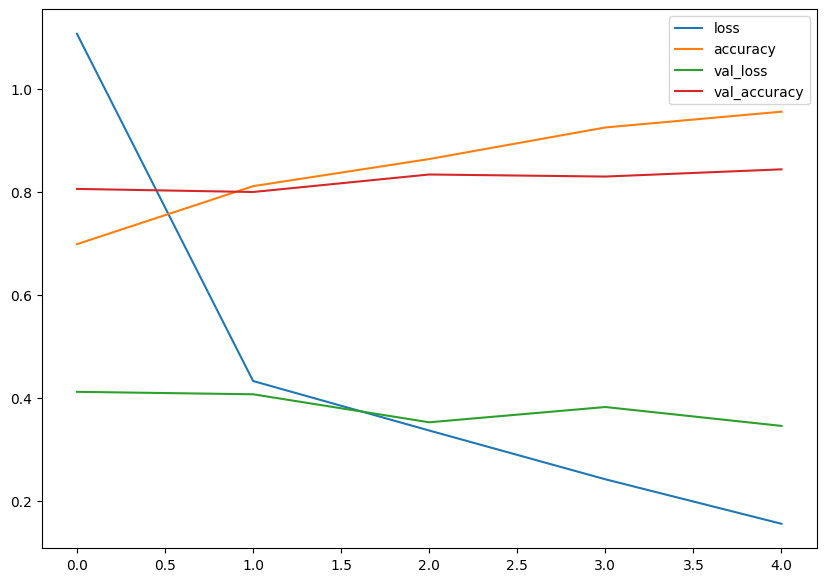

In [14]:
pd.DataFrame(history_2.history).plot(figsize=(10, 7));

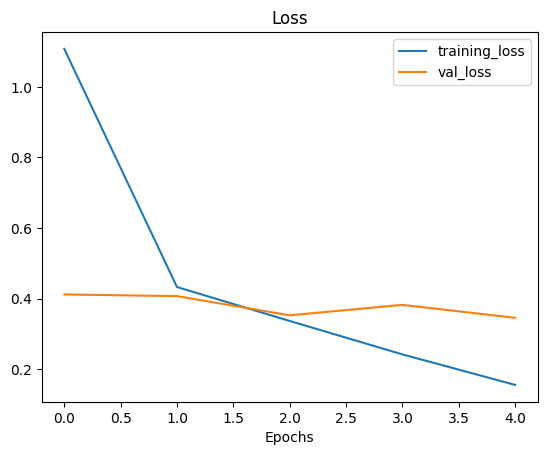

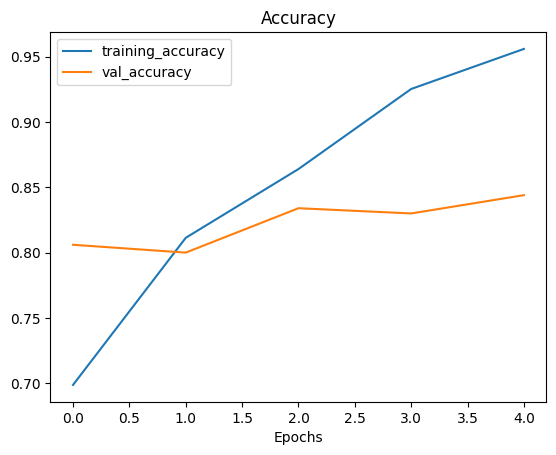

In [15]:
plot_loss_curves(history_2)

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
#Create
model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile
model_3.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 147ms/step - loss: 0.6501 - accuracy: 0.6293 - val_loss: 0.5281 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.5194 - accuracy: 0.7520 - val_loss: 0.4549 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4735 - accuracy: 0.7840 - val_loss: 0.4070 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4537 - accuracy: 0.7993 - val_loss: 0.4090 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4114 - accuracy: 0.8127 - val_loss: 0.3475 - val_accuracy: 0.8420


In [18]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 26, 26, 10)       

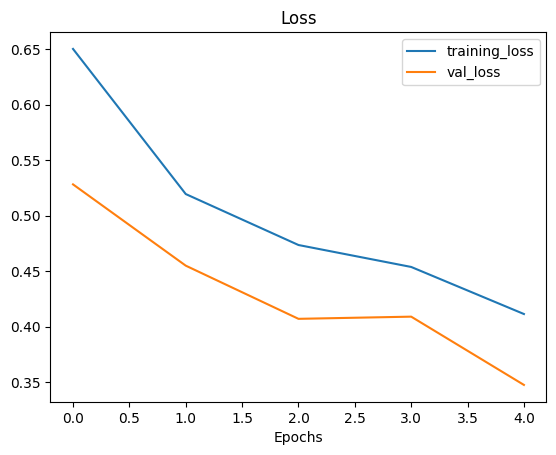

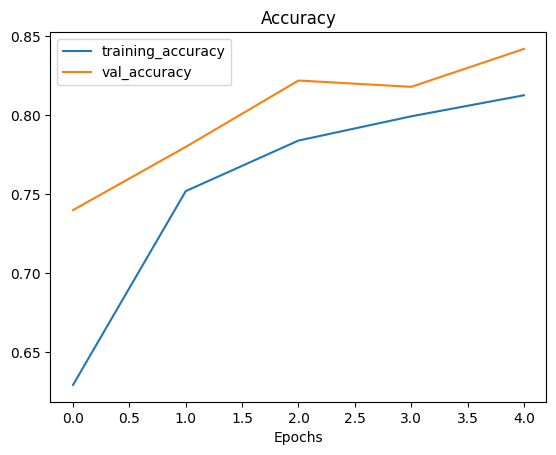

In [19]:
plot_loss_curves(history_3)

In [20]:
#With Data Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


In [21]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


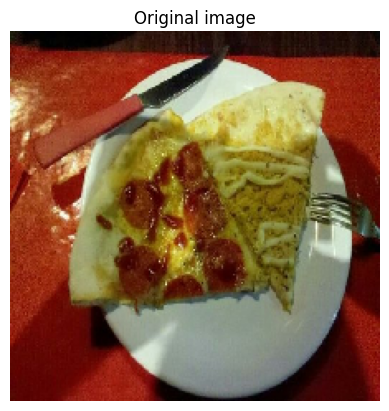

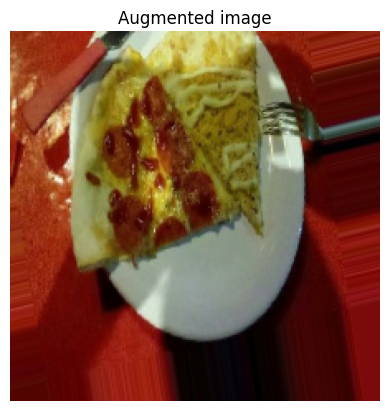

In [22]:
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [23]:
# Create the model (same as model_5)
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 464ms/step - loss: 0.7029 - accuracy: 0.4753 - val_loss: 0.6702 - val_accuracy: 0.5460
Epoch 2/5
47/47 [==============================] - 22s 464ms/step - loss: 0.6973 - accuracy: 0.4793 - val_loss: 0.6678 - val_accuracy: 0.6840
Epoch 3/5
47/47 [==============================] - 21s 459ms/step - loss: 0.6819 - accuracy: 0.5613 - val_loss: 0.6339 - val_accuracy: 0.6420
Epoch 4/5
47/47 [==============================] - 20s 430ms/step - loss: 0.6389 - accuracy: 0.6280 - val_loss: 0.4980 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6139 - accuracy: 0.6933 - val_loss: 0.5298 - val_accuracy: 0.7840


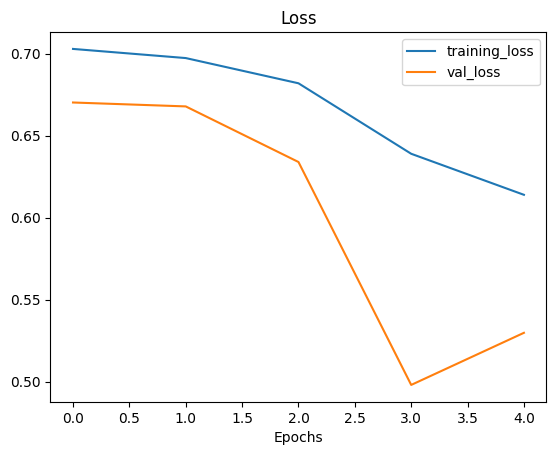

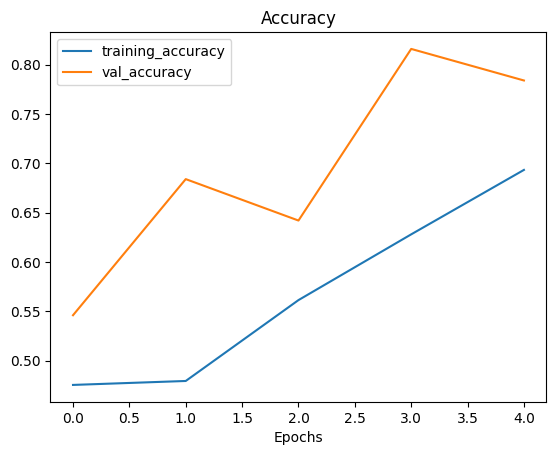

In [24]:
plot_loss_curves(history_4)

In [25]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [26]:
# Create the model (same as model_5 and model_6)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 459ms/step - loss: 0.6813 - accuracy: 0.5727 - val_loss: 0.5831 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5721 - accuracy: 0.7300 - val_loss: 0.5095 - val_accuracy: 0.7440
Epoch 3/5
47/47 [==============================] - 21s 433ms/step - loss: 0.5320 - accuracy: 0.7467 - val_loss: 0.5142 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 22s 462ms/step - loss: 0.5190 - accuracy: 0.7633 - val_loss: 0.3924 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 20s 436ms/step - loss: 0.4999 - accuracy: 0.7773 - val_loss: 0.4492 - val_accuracy: 0.7840


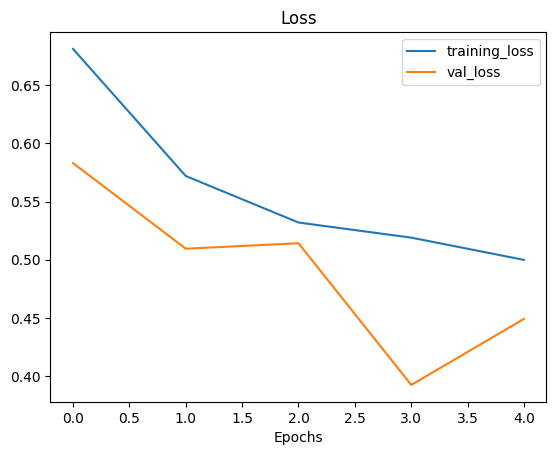

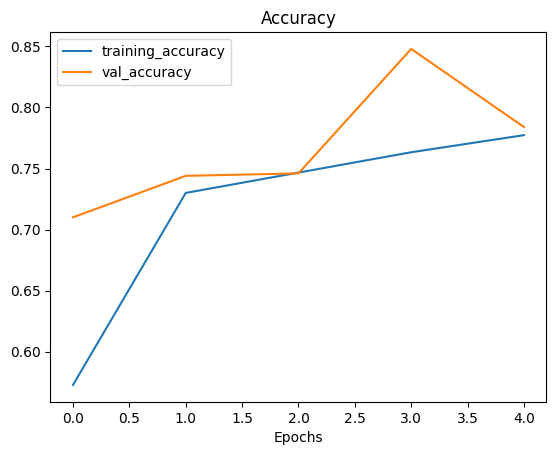

In [27]:
plot_loss_curves(history_5)

In [28]:
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 435ms/step - loss: 0.5987 - accuracy: 0.6633 - val_loss: 0.4524 - val_accuracy: 0.7900
Epoch 2/5
47/47 [==============================] - 22s 474ms/step - loss: 0.5306 - accuracy: 0.7420 - val_loss: 0.3719 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 22s 469ms/step - loss: 0.4648 - accuracy: 0.7873 - val_loss: 0.3623 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4672 - accuracy: 0.7807 - val_loss: 0.3407 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 21s 444ms/step - loss: 0.4585 - accuracy: 0.8000 - val_loss: 0.3355 - val_accuracy: 0.8640


In [29]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 flatten (Flatten)           (None, 112360)            0         
                                                        

In [30]:
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

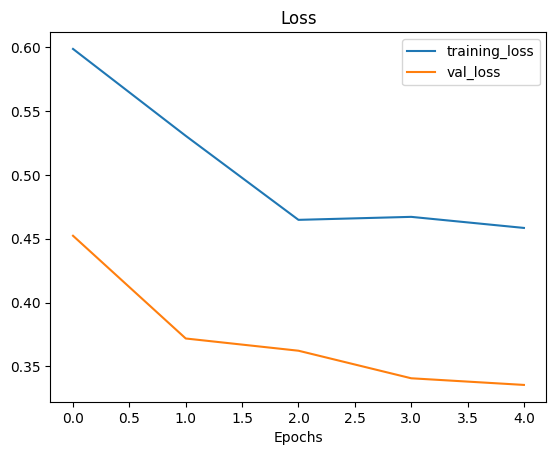

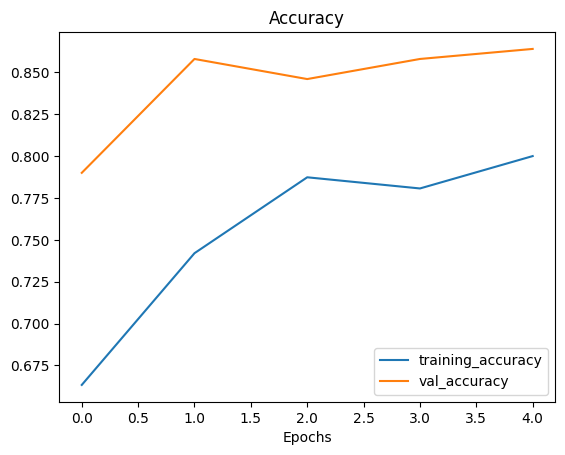

In [31]:
plot_loss_curves(history_6)

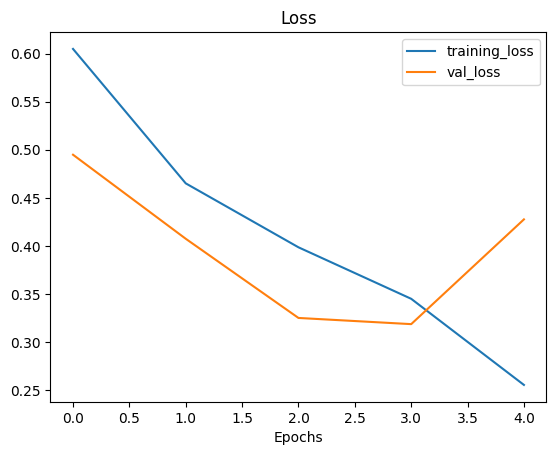

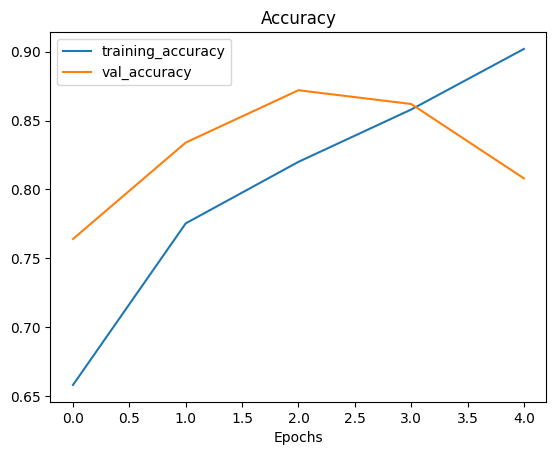

In [32]:
plot_loss_curves(history_1)

Testing with other images

In [33]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [34]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

--2024-01-06 18:56:45--  https://www.pizzauniversity.org/wp/wp-content/uploads/2019/03/PIC_6504.jpg
Resolving www.pizzauniversity.org (www.pizzauniversity.org)... 192.124.249.138
Connecting to www.pizzauniversity.org (www.pizzauniversity.org)|192.124.249.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177900 (174K) [image/jpeg]
Saving to: ‘PIC_6504.jpg’

PIC_6504.jpg        100%[===================>] 173.73K  --.-KB/s    in 0.07s   

2024-01-06 18:56:45 (2.57 MB/s) - ‘PIC_6504.jpg’ saved [177900/177900]

1/1 [==============================] - 0s 373ms/step


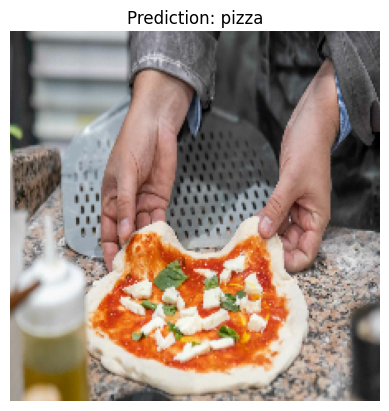

In [35]:
!wget https://www.pizzauniversity.org/wp/wp-content/uploads/2019/03/PIC_6504.jpg
pred_and_plot(model_6, "PIC_6504.jpg", class_names)

# Multi-Class Classification

In [36]:
# Download zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

--2024-01-06 18:56:46--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  81.3MB/s    in 5.9s    

2024-01-06 18:56:52 (84.2 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_class

In [37]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (306, 512, 3)


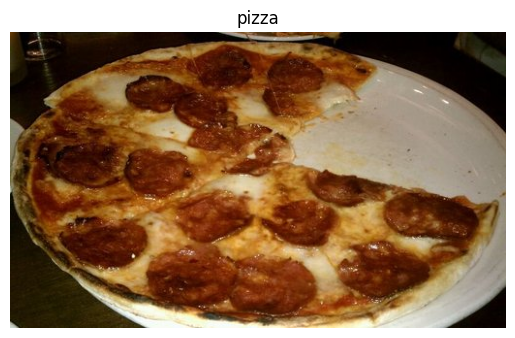

In [38]:
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [39]:
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [40]:
# Create
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile
model_7.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_7 = model_7.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 32s 128ms/step - loss: 2.1950 - accuracy: 0.1799 - val_loss: 2.0035 - val_accuracy: 0.2844
Epoch 2/5
235/235 [==============================] - 28s 119ms/step - loss: 1.9696 - accuracy: 0.3131 - val_loss: 1.9268 - val_accuracy: 0.3260
Epoch 3/5
235/235 [==============================] - 30s 129ms/step - loss: 1.7805 - accuracy: 0.3933 - val_loss: 1.9774 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 33s 139ms/step - loss: 1.4563 - accuracy: 0.5120 - val_loss: 1.9693 - val_accuracy: 0.3360
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.8700 - accuracy: 0.7157 - val_loss: 2.5099 - val_accuracy: 0.3004


In [41]:
model_7.evaluate(test_data)

79/79 [==============================] - 7s 94ms/step - loss: 2.5099 - accuracy: 0.3004


[2.509881019592285, 0.3003999888896942]

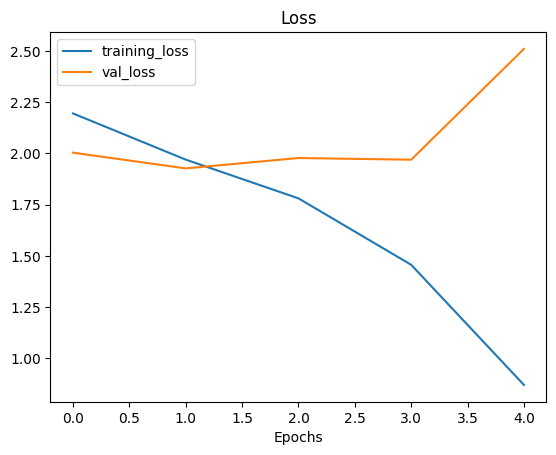

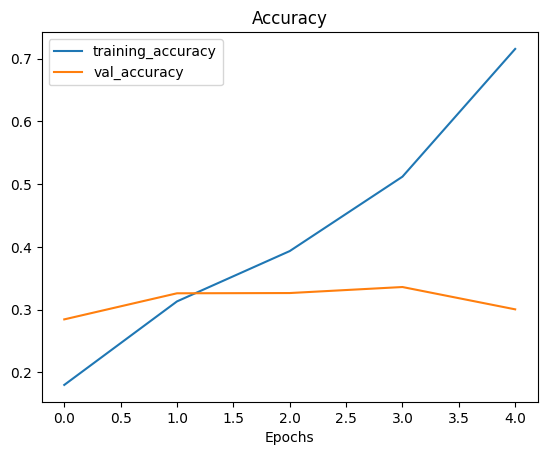

In [42]:
plot_loss_curves(history_7)

its over fitting

In [43]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [44]:
# Clone
model_8 = tf.keras.models.clone_model(model_7)

# Compile the cloned model
model_8.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 454ms/step - loss: 2.1863 - accuracy: 0.1908 - val_loss: 1.9887 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 108s 460ms/step - loss: 2.0752 - accuracy: 0.2613 - val_loss: 1.9586 - val_accuracy: 0.3052
Epoch 3/5
235/235 [==============================] - 112s 478ms/step - loss: 2.0284 - accuracy: 0.2800 - val_loss: 1.8949 - val_accuracy: 0.3348
Epoch 4/5
235/235 [==============================] - 106s 452ms/step - loss: 1.9898 - accuracy: 0.2975 - val_loss: 1.8721 - val_accuracy: 0.3492
Epoch 5/5
235/235 [==============================] - 114s 487ms/step - loss: 1.9556 - accuracy: 0.3180 - val_loss: 1.8266 - val_accuracy: 0.3784


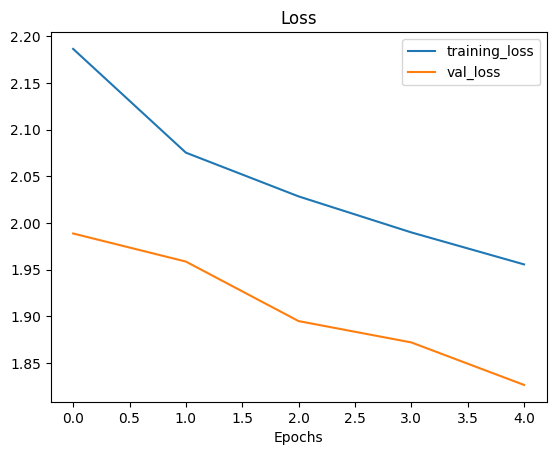

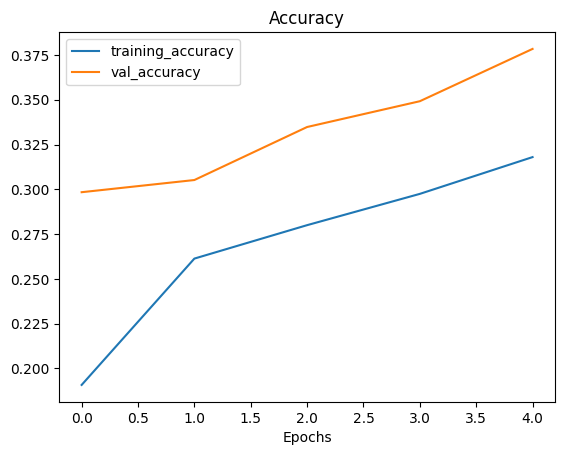

In [45]:
plot_loss_curves(history_8)

In [46]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [47]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 17ms/step


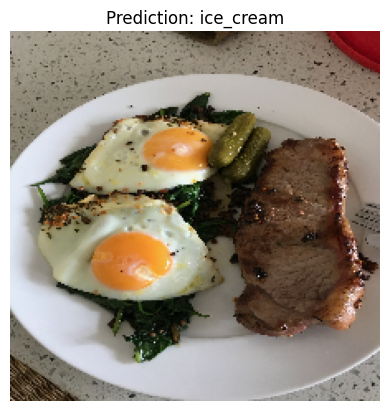

In [58]:
pred_and_plot(model_8, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


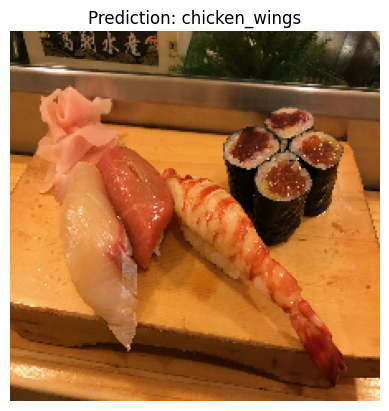

In [56]:
pred_and_plot(model_8, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 29ms/step


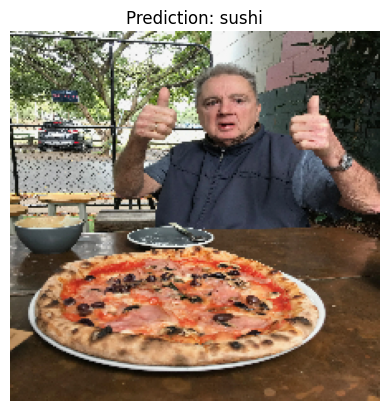

In [54]:
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 17ms/step


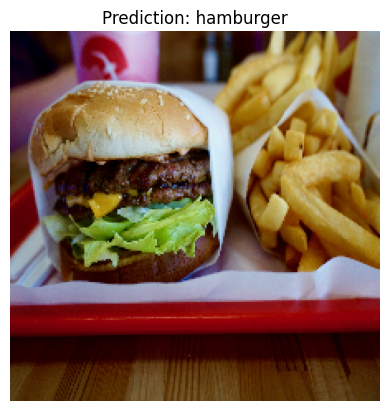

In [51]:
pred_and_plot(model_8, "03-hamburger.jpeg", class_names)